In [2]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:00.861666


In [3]:
%%time
data = pd.read_csv('NY property data.csv')

CPU times: user 2.32 s, sys: 661 ms, total: 2.98 s
Wall time: 9.77 s


In [4]:
data.shape

(1070994, 32)

In [5]:
numrecords = len(data)
print(numrecords)

1070994


In [25]:
df = pd.DataFrame()
df['columns'] = ["LOT","LTFRONT","LTDEPTH","STORIES","FULLVAL","AVLAND",
                 "AVTOT","EXLAND","EXTOT","EXCD1","BLDFRONT","BLDDEPTH","AVLAND2","AVTOT2","EXLAND2","EXTOT2","EXCD2"]
df['%populated'] = df['columns'].apply(lambda x: data[x].count()/numrecords * 100)
df['Min'] = df['columns'].apply(lambda x: data[x].min())
df['Max'] = df['columns'].apply(lambda x: data[x].max())
df['Mean'] = df['columns'].apply(lambda x: data[x].mean())
df['Std'] = df['columns'].apply(lambda x: data[x].std())
df['%zero'] = df['columns'].apply(lambda x: len(data[data[x] == 0]) * 100 /len(data[x]))
pd.options.display.float_format = '{:.2f}'.format
df

,columns,%populated,Min,Max,Mean,Std,%zero
0,LOT,100.00,1.00,9978.00,364.72,853.22,0.00
1,LTFRONT,100.00,0.00,9999.00,36.64,74.03,15.79
2,LTDEPTH,100.00,0.00,9999.00,88.86,76.40,15.89
3,STORIES,94.75,1.00,119.00,5.01,8.37,0.00
4,FULLVAL,100.00,0.00,6150000000.00,874264.51,11582430.99,1.21
5,AVLAND,100.00,0.00,2668500000.00,85067.92,4057260.06,1.21
6,AVTOT,100.00,0.00,4668308947.00,227238.17,6877529.31,1.21
7,EXLAND,100.00,0.00,2668500000.00,36423.89,3981575.79,45.91
8,EXTOT,100.00,0.00,4668308947.00,91186.98,6508402.82,40.39
9,EXCD1,59.62,1010.00,7170.00,1602.01,1384.23,0.00


In [7]:
# %%time
# import pandas_profiling
# data.profile_report(correlations={"cramers": {"calculate": False}})
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file('NY stats.html')

In [8]:
data.dtypes 

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [9]:
data.head().transpose()

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
BORO,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [10]:
data.tail().transpose()

,1070989,1070990,1070991,1070992,1070993
RECORD,1070990,1070991,1070992,1070993,1070994
BBLE,5080500083,5080500086,5080500089,5080500092,5080500094
BORO,5,5,5,5,5
BLOCK,8050,8050,8050,8050,8050
LOT,83,86,89,92,94
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,"TOBIN, GALE",SHERRI MILINAZZO,JOHN GERVASI,RITA M MOOG,EDWARD DONOHUE
BLDGCL,A1,A1,A1,A1,A1
TAXCLASS,1,1,1,1,1
LTFRONT,60,62,53,52,50


In [11]:
data.count()

RECORD      1070994
BBLE        1070994
BORO        1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

### explore each field 

In [12]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

In [11]:
len(data['RECORD'].unique())

1070994

In [12]:
len(data['RECORD'])

1070994

<AxesSubplot:>

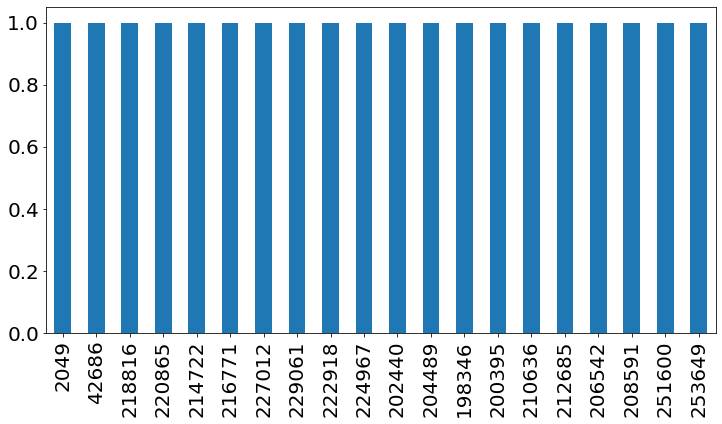

In [13]:
data['RECORD'].value_counts().head(20).plot(kind='bar')

In [14]:
len(data['BBLE'].unique())

1070994

<AxesSubplot:>

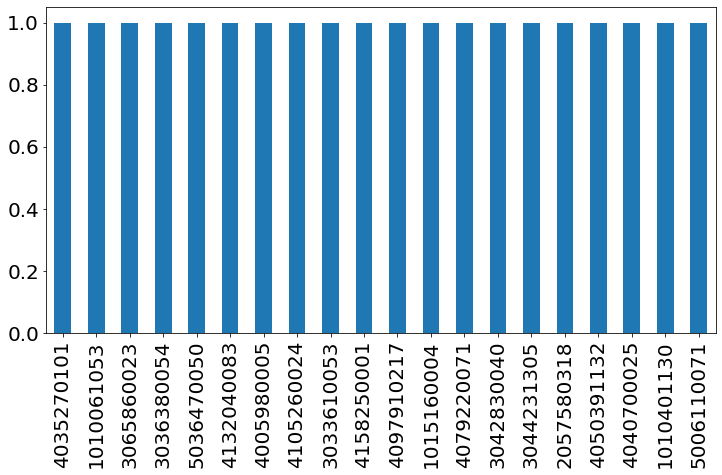

In [15]:
data['BBLE'].value_counts().head(20).plot(kind='bar')

In [16]:
len(data['BORO'].unique())

5

In [17]:
data['BORO'].count() * 100 / numrecords

100.0

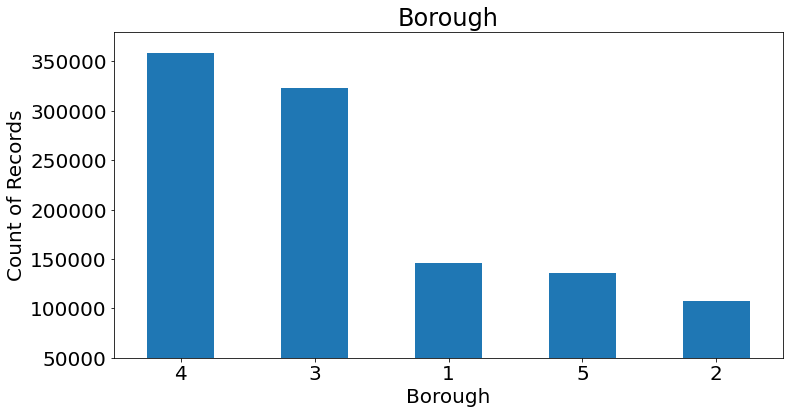

In [17]:
data['BORO'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Borough")
plt.ylabel("Count of Records")
plt.title('Borough')
plt.ylim(50000,380000)
plt.savefig('plot')

In [19]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [20]:
len(data['BLOCK'].unique())

13984

In [21]:
data['BLOCK'].min()

1

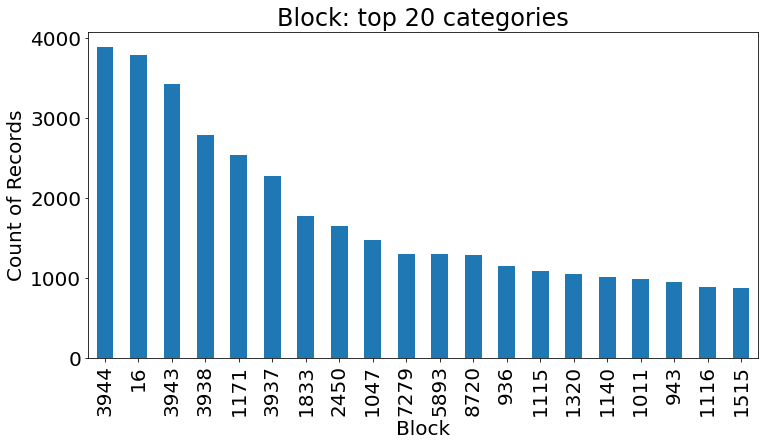

In [24]:
data['BLOCK'].value_counts().head(20).plot(kind='bar')
plt.xlabel("Block")
plt.ylabel("Count of Records")
plt.title('Block: top 20 categories')
plt.savefig('plot')

In [23]:
data['LOT'].count() * 100 / numrecords

100.0

In [24]:
len(data['LOT'].unique())

6366

In [25]:
data['LOT'].value_counts()

1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
5403        1
8036        1
4965        1
8037        1
4887        1
Name: LOT, Length: 6366, dtype: int64

In [26]:
data['LOT'].min()

1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1'),
  Text(1, 0, '20'),
  Text(2, 0, '15'),
  Text(3, 0, '12'),
  Text(4, 0, '14'),
  Text(5, 0, '16'),
  Text(6, 0, '17'),
  Text(7, 0, '18'),
  Text(8, 0, '25'),
  Text(9, 0, '21'),
  Text(10, 0, '23'),
  Text(11, 0, '22'),
  Text(12, 0, '6'),
  Text(13, 0, '19'),
  Text(14, 0, '30'),
  Text(15, 0, '24'),
  Text(16, 0, '26'),
  Text(17, 0, '28'),
  Text(18, 0, '29'),
  Text(19, 0, '7')])

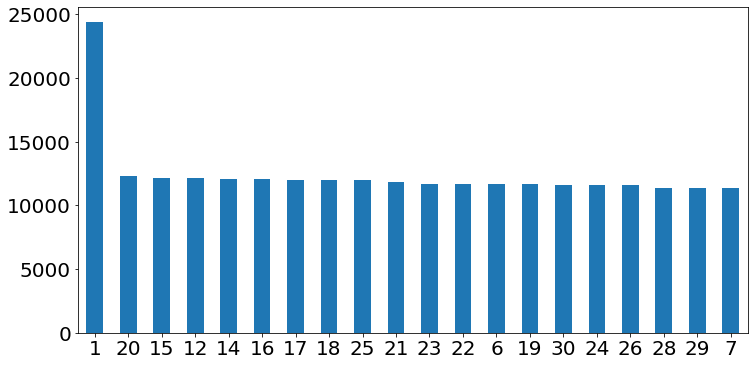

In [27]:
data['LOT'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOT'>

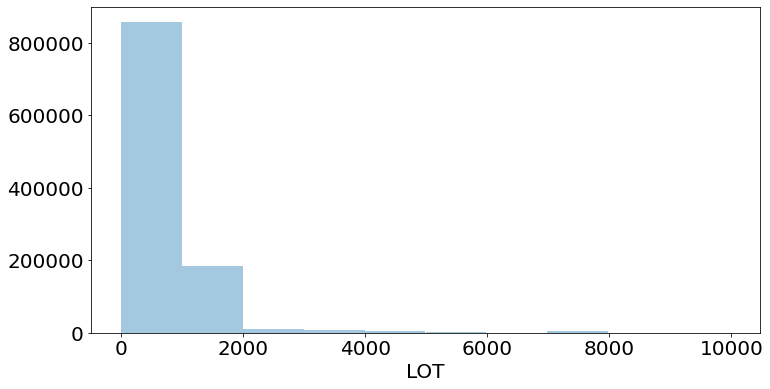

In [26]:
sns.distplot(data['LOT'],bins=10, kde=False)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Lot')

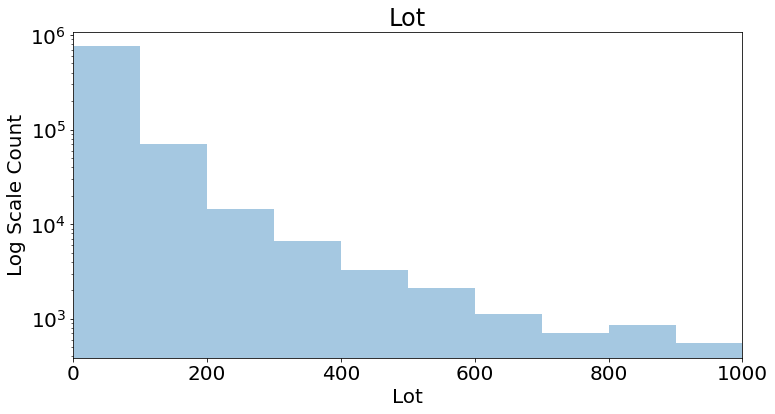

In [13]:
xhigh = 1000
plt.xlim(0,xhigh)
temp = data[data['LOT'] <= xhigh]
sns.distplot(temp['LOT'],bins=10, kde=False)
plt.yscale('log')
plt.xlabel("Lot")
plt.ylabel("Log Scale Count")
plt.title('Lot')

In [29]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [30]:
len(data['EASEMENT'].unique())

13

In [31]:
data['EASEMENT'].value_counts()

E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
P       3
L       3
M       2
U       1
Name: EASEMENT, dtype: int64

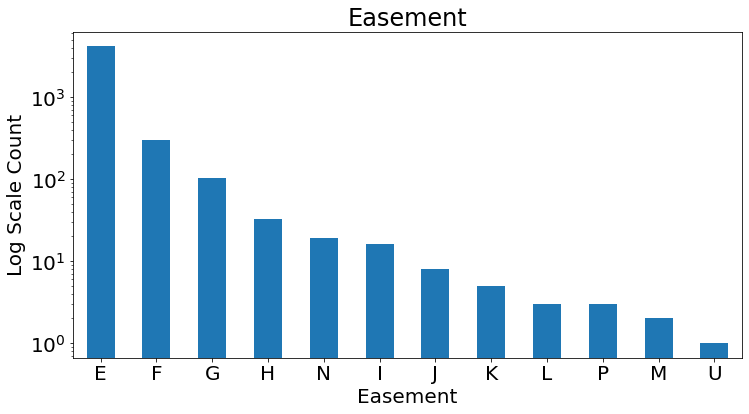

In [35]:
plt.yscale('log')
plt.xlabel("Easement")
plt.ylabel("Log Scale Count")
plt.title('Easement')
data['EASEMENT'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.savefig('plot.png')

<AxesSubplot:>

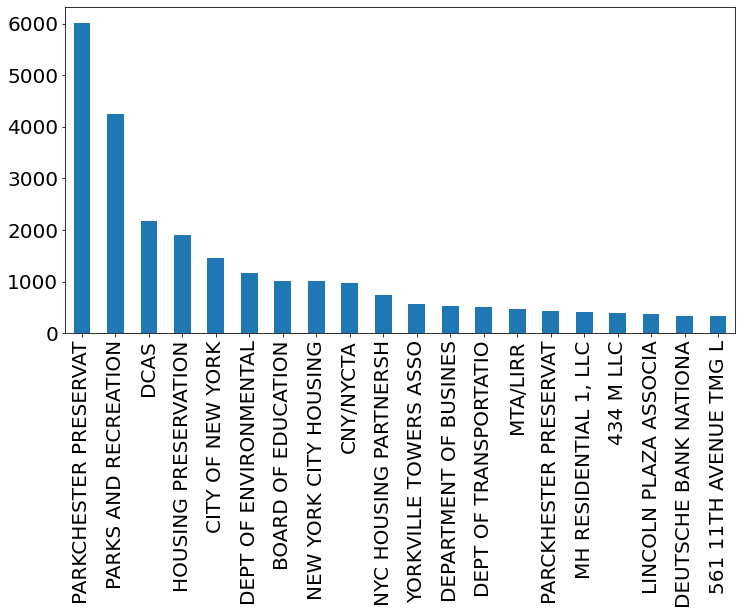

In [33]:
plt.xlabel("Owner")
plt.ylabel("Count")
plt.title('Owner: top 20 categories')
data['OWNER'].value_counts().head(20).plot(kind='bar')

In [34]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [35]:
len(data['OWNER'].unique())

863348

In [36]:
data['OWNER'].value_counts()

PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
JEROME J WALSH              1
RAFAEL A. PADILLA           1
GUCLEN GLORIA               1
LUCILLE DEMAIO              1
EDWARDS, CLIFTON            1
Name: OWNER, Length: 863347, dtype: int64

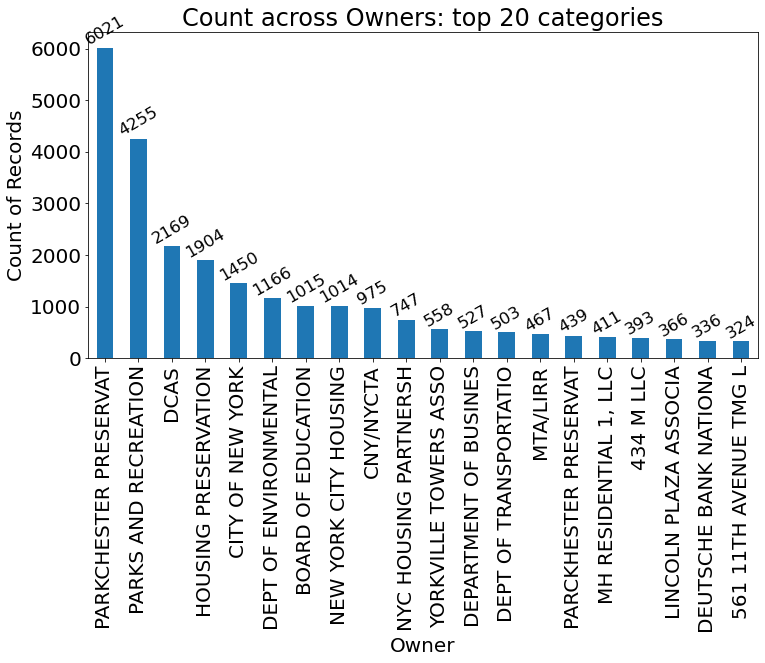

In [42]:
own = data['OWNER'].value_counts().head(20)

data['OWNER'].value_counts().head(20).plot(kind='bar')
j= 0
for i in own.index:    
       plt.text(j,own[i],own[i],ha = "center", va = "bottom", fontsize = 'small',rotation = 30)
       j = j+1
plt.xticks(rotation=90)
plt.xlabel("Owner")
plt.ylabel("Count of Records")
plt.title('Count across Owners: top 20 categories')
plt.savefig('plot.jpeg')

In [37]:
len(data['BLDGCL'].unique())

200

In [38]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [39]:
data['BLDGCL'].value_counts()

R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I2         4
I3         4
H7         3
Y5         1
E6         1
Name: BLDGCL, Length: 200, dtype: int64

In [40]:
data[data['BLDGCL'] == 0]

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'R4'),
  Text(1, 0, 'A1'),
  Text(2, 0, 'A5'),
  Text(3, 0, 'B1'),
  Text(4, 0, 'B2'),
  Text(5, 0, 'C0'),
  Text(6, 0, 'B3'),
  Text(7, 0, 'A2'),
  Text(8, 0, 'A9'),
  Text(9, 0, 'B9'),
  Text(10, 0, 'V0'),
  Text(11, 0, 'R5'),
  Text(12, 0, 'R3'),
  Text(13, 0, 'C3'),
  Text(14, 0, 'C1'),
  Text(15, 0, 'S2'),
  Text(16, 0, 'C2'),
  Text(17, 0, 'R2'),
  Text(18, 0, 'R1'),
  Text(19, 0, 'K1')])

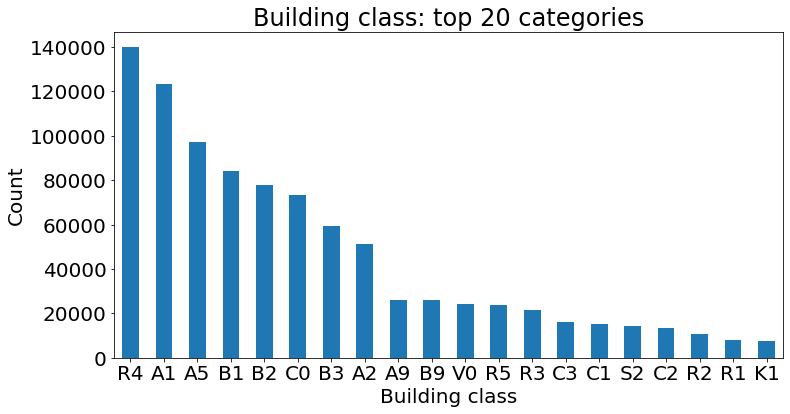

In [43]:
plt.xlabel("Building class")
plt.ylabel("Count")
plt.title('Building class: top 20 categories')
data['BLDGCL'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [42]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [43]:
len(data['TAXCLASS'].unique())

11

In [44]:
data['TAXCLASS'].value_counts()

1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: TAXCLASS, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '2A'),
  Text(4, 0, '1B'),
  Text(5, 0, '1A'),
  Text(6, 0, '2B'),
  Text(7, 0, '2C'),
  Text(8, 0, '3'),
  Text(9, 0, '1C'),
  Text(10, 0, '1D')])

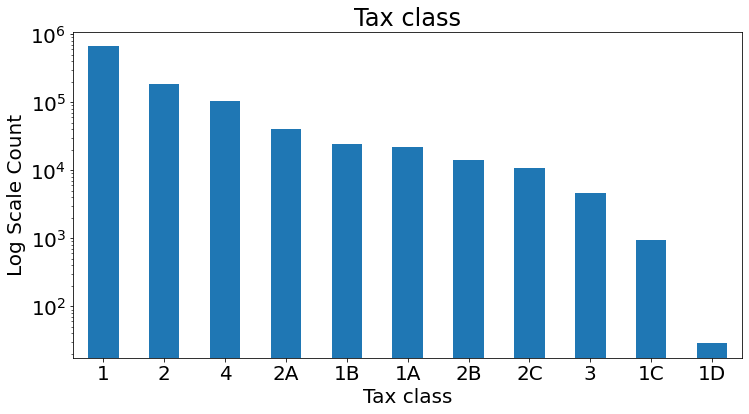

In [44]:
plt.xlabel("Tax class")
plt.ylabel("Log Scale Count")
plt.title('Tax class')
plt.yscale('log')
data['TAXCLASS'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '2A'),
  Text(4, 0, '1B'),
  Text(5, 0, '1A'),
  Text(6, 0, '2B'),
  Text(7, 0, '2C'),
  Text(8, 0, '3'),
  Text(9, 0, '1C'),
  Text(10, 0, '1D')])

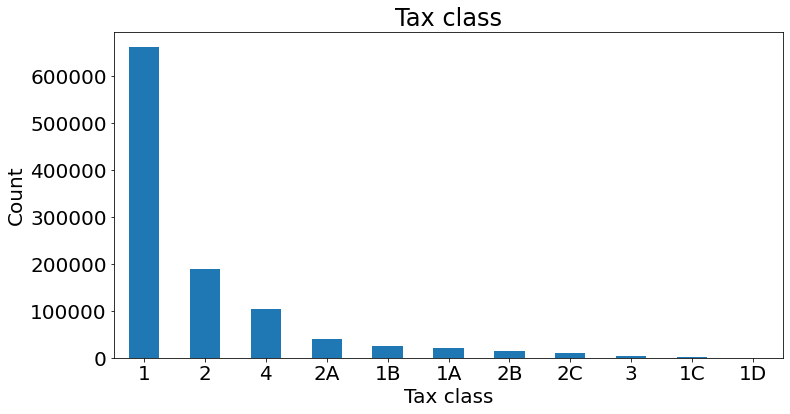

In [59]:
plt.xlabel("Tax class")
plt.ylabel("Count")
plt.title('Tax class')
#plt.yscale('log')
data['TAXCLASS'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [46]:
data['LTFRONT'].count() * 100 / numrecords

100.0

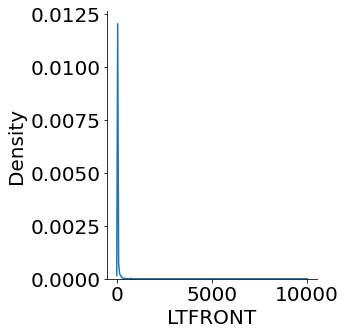

In [47]:
sns.displot(data['LTFRONT'], kind = 'kde')

<AxesSubplot:xlabel='LTFRONT'>

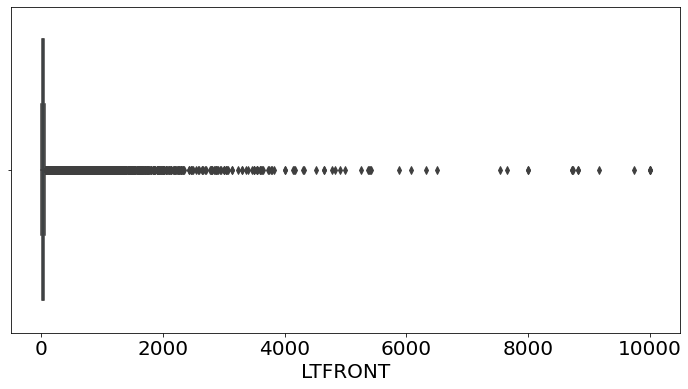

In [48]:
sns.boxplot(x='LTFRONT', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'lot width')

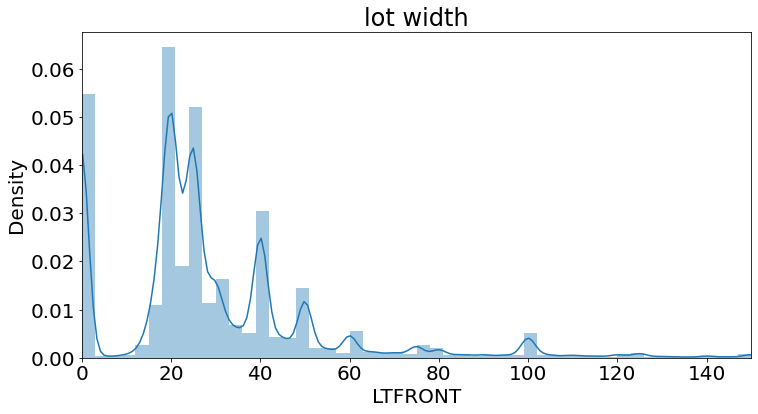

In [67]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=50, kde=True)
plt.title('lot width')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTFRONT'>

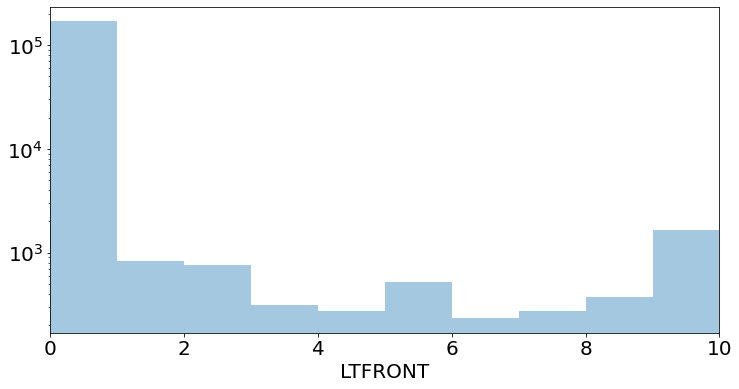

In [50]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='LTDEPTH'>

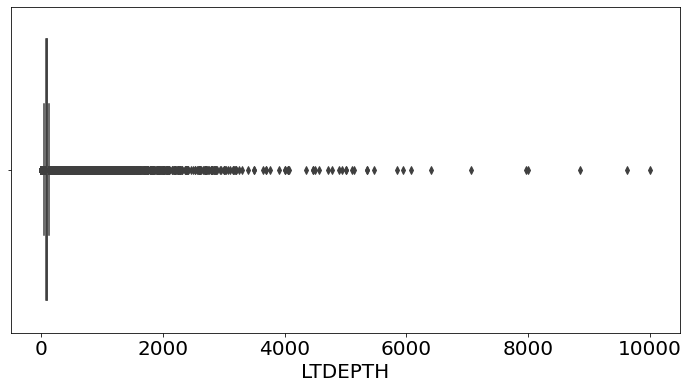

In [51]:
sns.boxplot(x='LTDEPTH', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'lot depth')

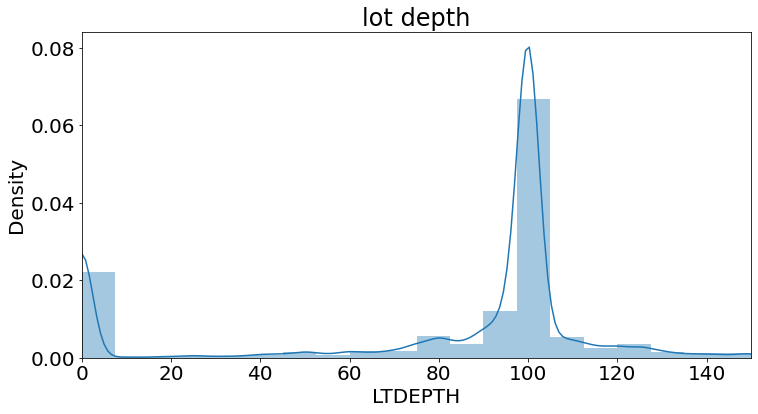

In [72]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
sns.distplot(temp['LTDEPTH'],bins=20, kde=True)
plt.title('lot depth')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTDEPTH'>

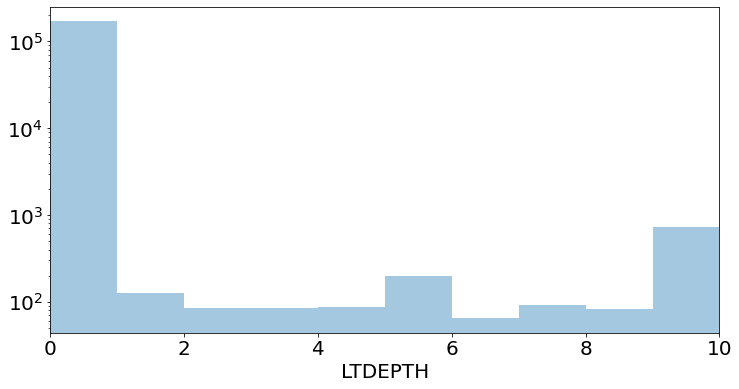

In [53]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTDEPTH'],bins=10, kde=False)

### Look at the number of sizes that are zero or unusually small. These aren't really zero, more likely they're missing data

In [54]:
len(data[data['LTFRONT']==0])

169108

In [55]:
len(data[data['LTFRONT']==1])

839

In [56]:
len(data[data["LTFRONT"]==2])

762

In [57]:
data['LTFRONT'].value_counts()

0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1032         1
1461         1
2485         1
2059         1
1023         1
Name: LTFRONT, Length: 1297, dtype: int64

In [58]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='LTDEPTH'>

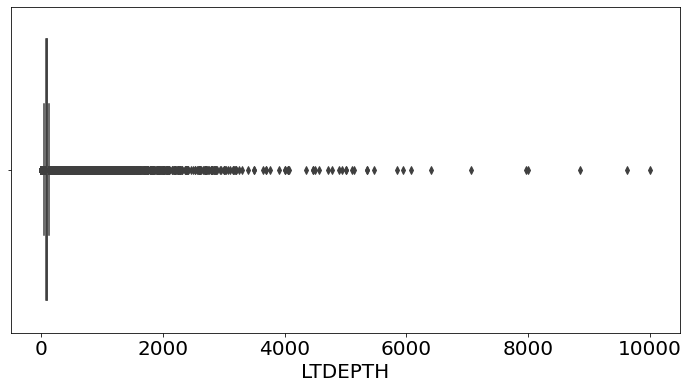

In [59]:
sns.boxplot(x='LTDEPTH', data=data)

In [61]:
len(data[data['LTDEPTH']==1])

127

In [62]:
len(data[data["LTDEPTH"]==2])

84

In [63]:
data['LTDEPTH'].value_counts()

100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
2276         1
3300         1
2278         1
2281         1
1471         1
Name: LTDEPTH, Length: 1370, dtype: int64

In [64]:
data['EXT'].value_counts()

G     266970
E      49442
EG     37893
Name: EXT, dtype: int64

In [65]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

(array([0, 1, 2]), [Text(0, 0, 'G'), Text(1, 0, 'E'), Text(2, 0, 'EG')])

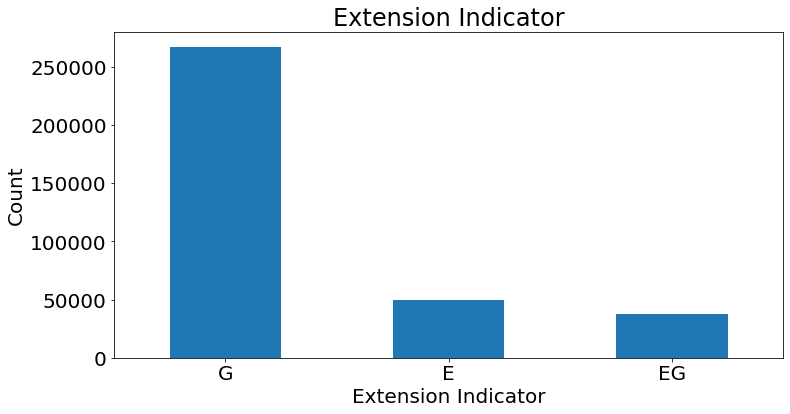

In [73]:
data['EXT'].value_counts().head(20).plot(kind='bar')
plt.xlabel("Extension Indicator")
plt.ylabel("Count")
plt.title('Extension Indicator')
plt.xticks(rotation=0)

In [67]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [68]:
sum(pd.isnull(data['STORIES']))

56264

<AxesSubplot:xlabel='STORIES'>

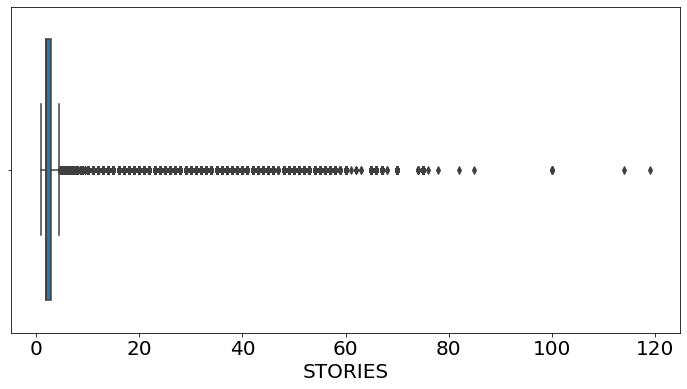

In [69]:
sns.boxplot(x='STORIES', data=data)

In [70]:
len(data[data['STORIES'] == 0])

0

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Stories')

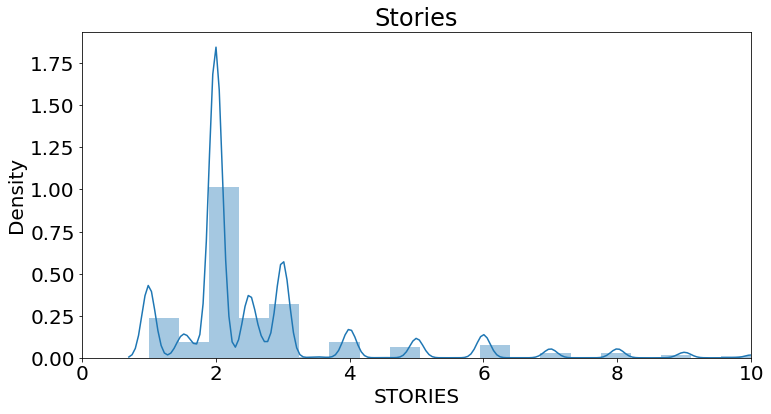

In [87]:
xhigh = 10
temp = data[data['STORIES'] > 0]
plt.xlim(0,xhigh)
temp = temp[temp['STORIES'] <= xhigh]
sns.distplot(temp['STORIES'],bins=20, kde=True)
plt.title('Stories')

In [72]:
len(data[data['STORIES'] == 1])

96706

In [82]:
data['STORIES'].value_counts().head(10)

2.00     415092
3.00     130127
1.00      96706
2.50      82292
4.00      38342
6.00      30936
5.00      25971
1.50      24770
2.70      13595
12.00     12198
Name: STORIES, dtype: int64

In [30]:
data['STORIES'].describe().round(2)

count    1014730.00
mean           5.01
std            8.37
min            1.00
25%            2.00
50%            2.00
75%            3.00
max          119.00
Name: STORIES, dtype: float64

In [74]:
data['FULLVAL'].count() * 100 / numrecords

100.0

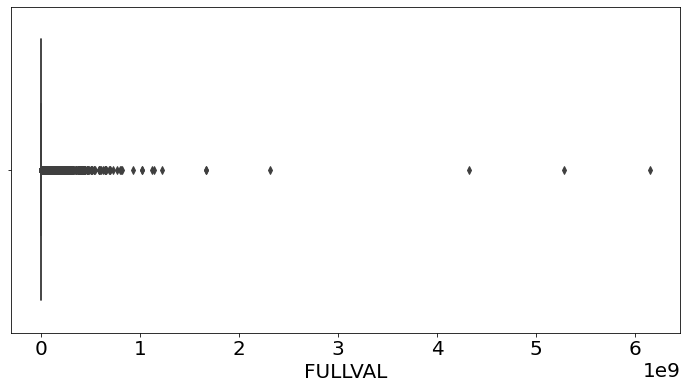

In [75]:
sns.boxplot(x='FULLVAL', data=data)
plt.savefig("boxplot.png")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


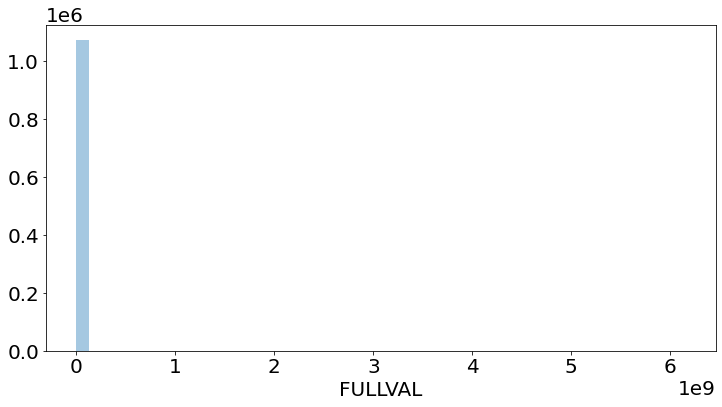

In [76]:
sns.distplot(data['FULLVAL'],kde=False)
plt.savefig('dist bad.png')

In [42]:
len(data[data['FULLVAL']==0])/data['FULLVAL'].count()*100

1.2144792594543015

In [78]:
len(data[data['FULLVAL']==1])

0

In [79]:
len(data[data["FULLVAL"]==2])

0

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


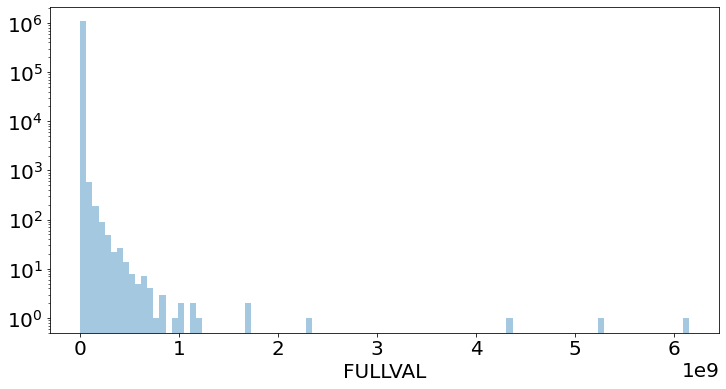

In [80]:
temp = data[data['FULLVAL'] >= 0]
ax = sns.distplot(temp['FULLVAL'],bins=100, kde=False)
ax.set_yscale('log')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Market Value')

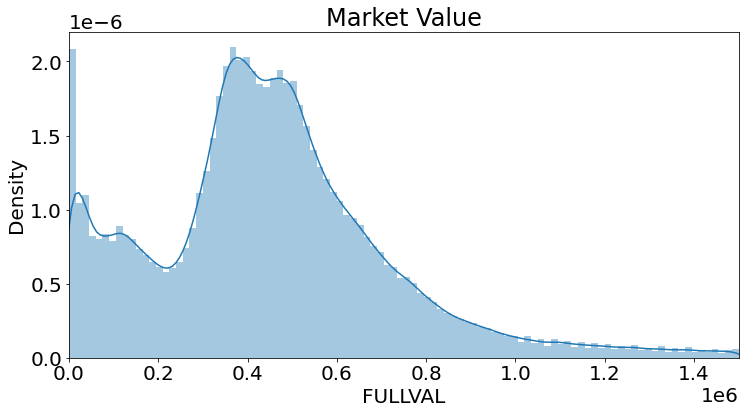

In [88]:
xhigh = 1500000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=True)
plt.title('Market Value')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


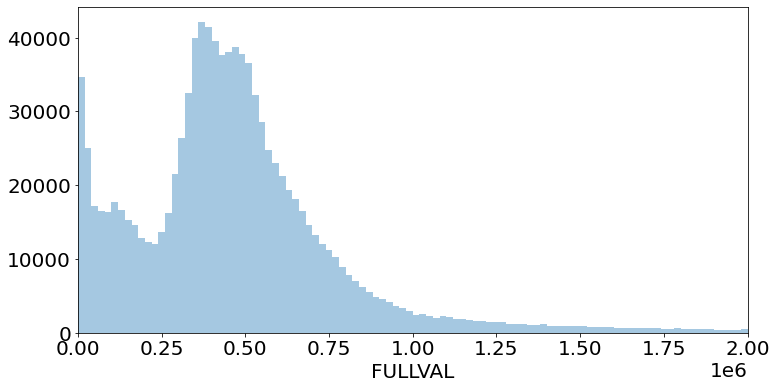

In [82]:
xhigh = 2000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=False)
plt.savefig('dist good.png')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

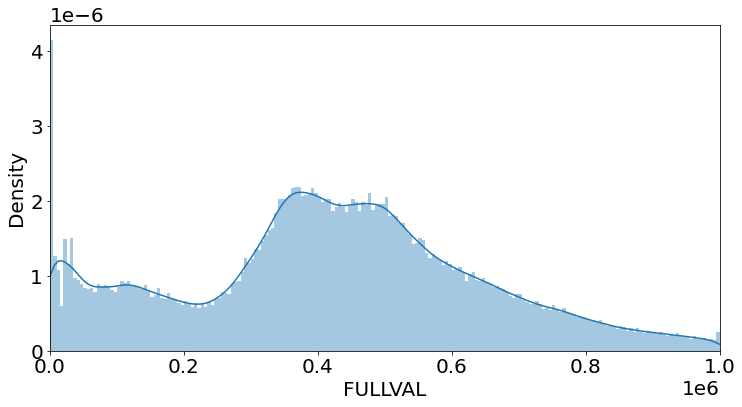

In [83]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=200, kde=True)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL'>

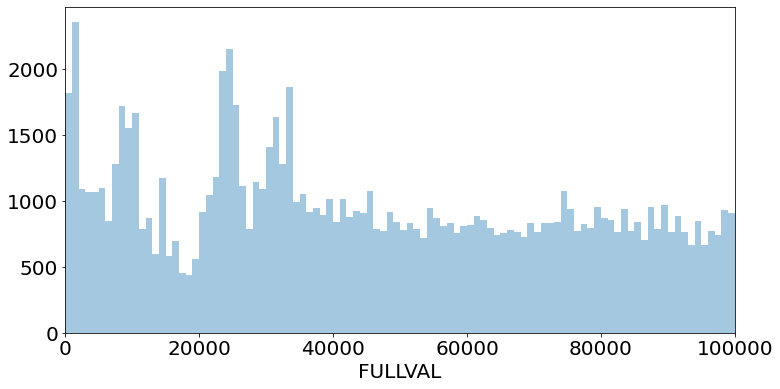

In [84]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[(data['FULLVAL'] <= xhigh) & (data['FULLVAL']) > 0]
sns.distplot(temp['FULLVAL'],bins=100, kde=False)

In [85]:
len(data[data['FULLVAL'] == 0])

13007

In [86]:
data['AVLAND'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVLAND'>

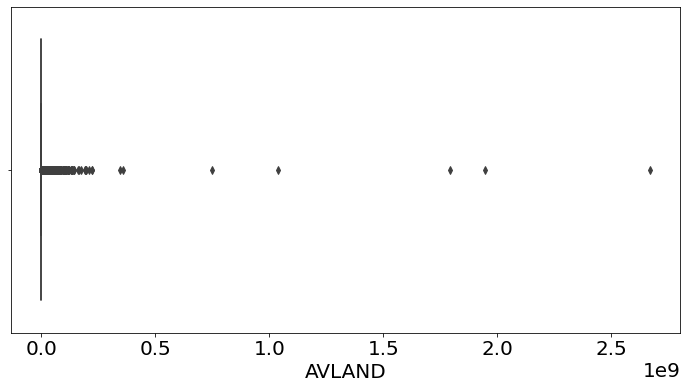

In [87]:
sns.boxplot(x='AVLAND', data=data)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVLAND'>

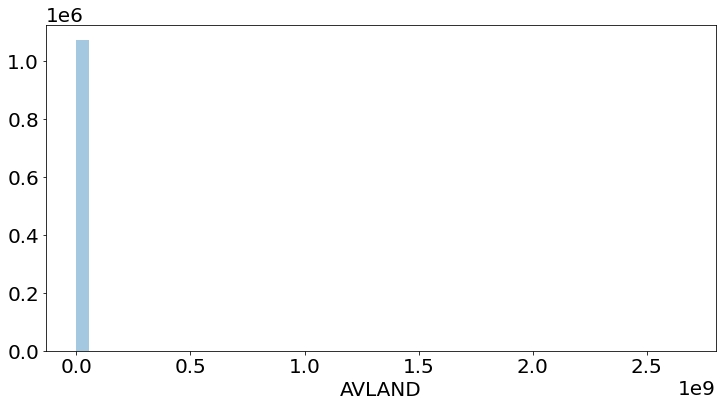

In [88]:
sns.distplot(data['AVLAND'],kde=False)

In [55]:
len(data[data['AVLAND']==0])/data['AVLAND'].count()*100

1.2146660018636892

In [90]:
len(data[data['AVLAND']==1])

3

In [91]:
len(data[data["AVLAND"]==2])

13

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual Land Value')

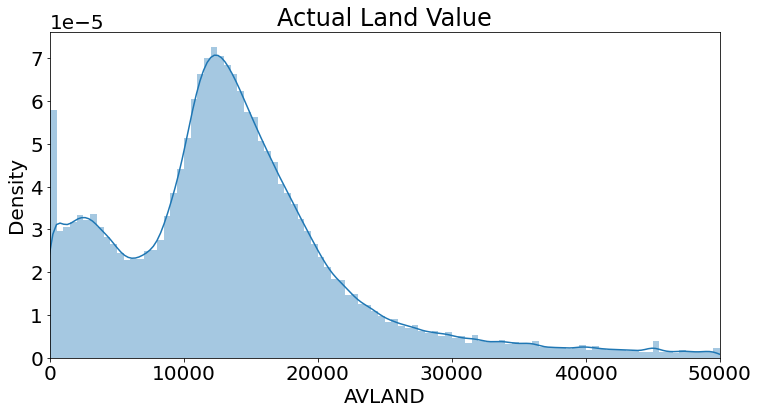

In [89]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.distplot(temp['AVLAND'],bins=100, kde=True)
plt.title("Actual Land Value")

In [93]:
data['AVTOT'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVTOT'>

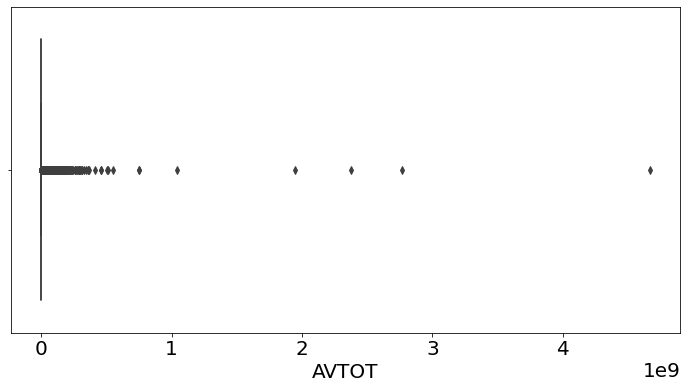

In [94]:
sns.boxplot(x='AVTOT', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual Total Value')

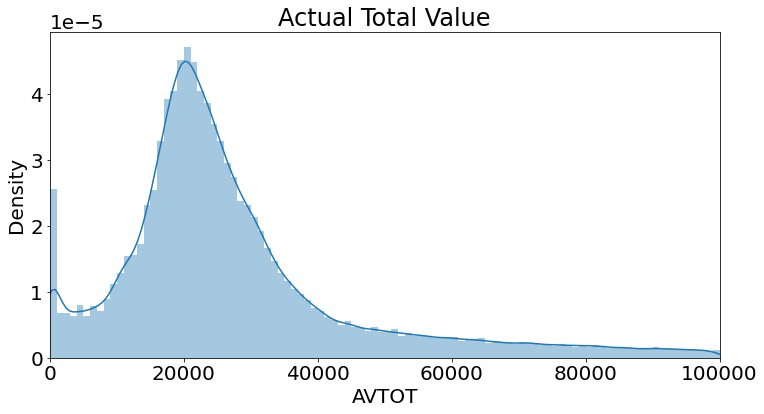

In [97]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.distplot(temp['AVTOT'],bins=100, kde=True)
plt.title("Actual Total Value")

In [59]:
len(data[data['AVTOT']==0])/len(data['AVTOT'])*100

1.2144792594543015

In [97]:
len(data[data['AVTOT']==1])

3

In [98]:
len(data[data["AVTOT"]==2])

2

In [64]:
data['AVTOT'].describe().apply(lambda x: '%.2f' % x)

count       1070994.00
mean         227238.17
std         6877529.31
min               0.00
25%           18374.00
50%           25340.00
75%           45438.00
max      4668308947.00
Name: AVTOT, dtype: object

In [99]:
data['EXLAND'].count() * 100 / numrecords

100.0

In [65]:
data['EXLAND'].describe().apply(lambda x: '%.2f' % x)

count       1070994.00
mean          36423.89
std         3981575.79
min               0.00
25%               0.00
50%            1620.00
75%            1620.00
max      2668500000.00
Name: EXLAND, dtype: object

<AxesSubplot:xlabel='EXLAND'>

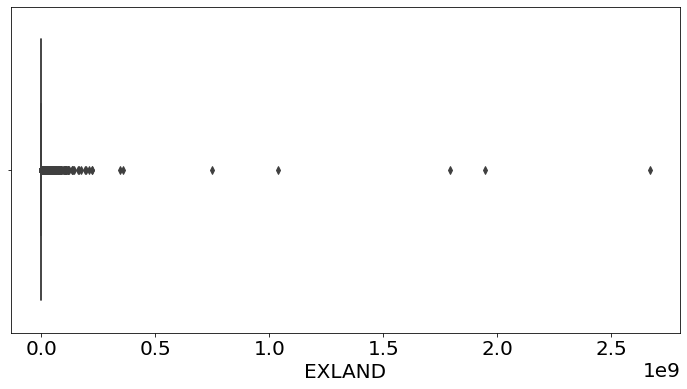

In [100]:
sns.boxplot(x='EXLAND', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual Exempt Land Value')

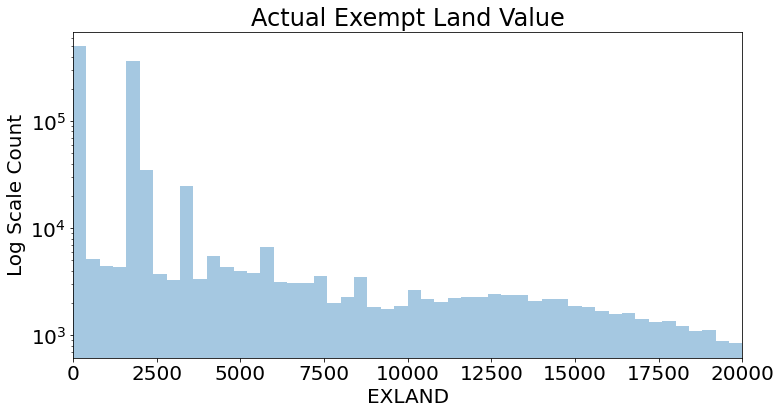

In [110]:
xhigh = 20000
plt.xlim(0,xhigh)
temp = data[data['EXLAND'] <= xhigh]
plt.yscale("log")
sns.distplot(temp['EXLAND'],bins=50, kde=False)
plt.ylabel("Log Scale Count")
plt.title("Actual Exempt Land Value")

In [67]:
len(data[data['EXLAND']==0])/len(data['EXLAND'])*100

45.910527976814066

In [103]:
len(data[data['EXLAND']==1])

8

In [104]:
len(data[data["EXLAND"]==2])

15

In [105]:
data['EXTOT'].count() * 100 / numrecords

100.0

In [68]:
data['EXTOT'].describe().apply(lambda x: '%.2f' % x) 

count       1070994.00
mean          91186.98
std         6508402.82
min               0.00
25%               0.00
50%            1620.00
75%            2090.00
max      4668308947.00
Name: EXTOT, dtype: object

<AxesSubplot:xlabel='EXTOT'>

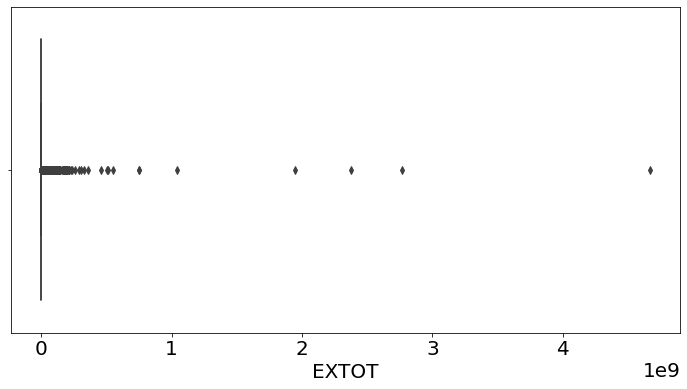

In [106]:
sns.boxplot(x='EXTOT', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual Exempt Land Total')

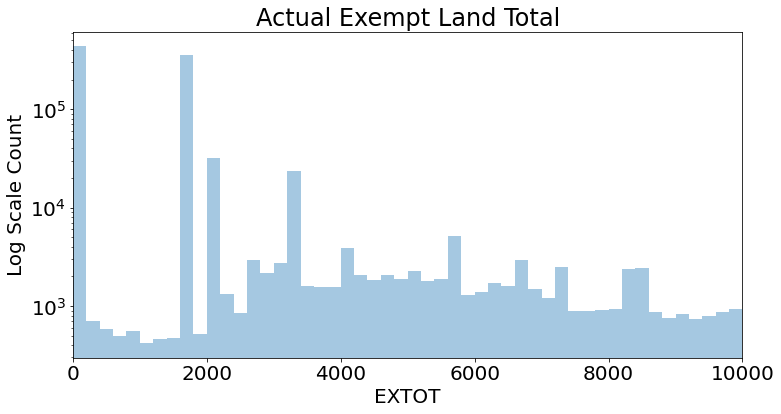

In [113]:
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXTOT'] <= xhigh]
sns.distplot(temp['EXTOT'],bins=50, kde=False)
plt.yscale("log")
plt.ylabel("Log Scale Count")
plt.title("Actual Exempt Land Total")

In [71]:
len(data[data['EXTOT']==0])/numrecords*100

40.38976875687445

In [109]:
len(data[data['EXTOT']==1])

10

In [110]:
len(data[data["EXTOT"]==2])

2

In [111]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

<AxesSubplot:xlabel='EXCD1'>

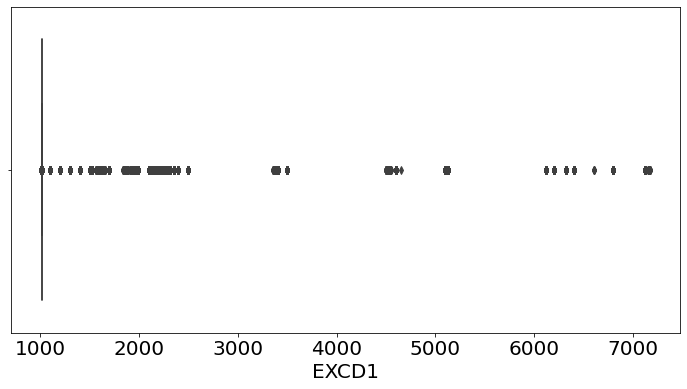

In [112]:
sns.boxplot(x='EXCD1', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Exempt Code 1')

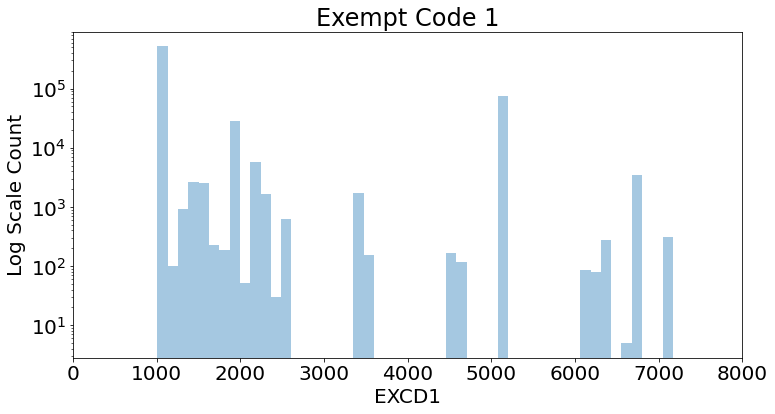

In [135]:
xhigh = 8000
plt.xlim(0,xhigh)
temp = data[data['EXCD1'] <= xhigh]
sns.distplot(temp['EXCD1'],bins=50, kde=False)
plt.yscale("log")
plt.ylabel("Log Scale Count")
plt.title("Exempt Code 1")

Text(0.5, 1.0, 'Exempt Code 1: top 20 categories')

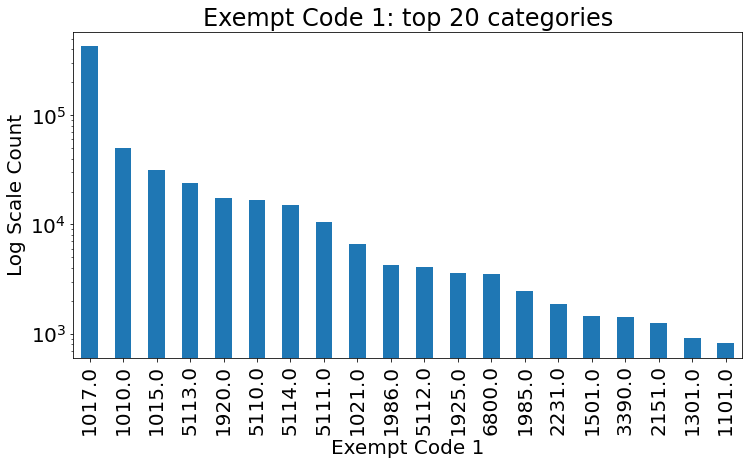

In [15]:
data['EXCD1'].value_counts().head(20).plot(kind='bar')
plt.yscale("log")
plt.ylabel("Log Scale Count")
plt.xlabel("Exempt Code 1")
plt.title("Exempt Code 1: top 20 categories")

In [124]:
data['EXCD1'].value_counts()

1017.00    425348
1010.00     49756
1015.00     31323
5113.00     23858
1920.00     17594
            ...  
1606.00         1
4650.00         1
1841.00         1
1562.00         1
1992.00         1
Name: EXCD1, Length: 129, dtype: int64

In [128]:
len(data['EXCD1'].unique())

130

In [74]:
len(data[data['EXCD1']==0])

0

In [115]:
len(data[data['EXCD1']==1])

0

In [116]:
len(data[data["EXCD1"]==2])

0

In [117]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [118]:
len(data['STADDR'].unique())

839281

In [119]:
data['STADDR'].value_counts()

501 SURF AVENUE        902
330 EAST 38 STREET     817
322 WEST 57 STREET     720
155 WEST 68 STREET     671
20 WEST 64 STREET      657
                      ... 
78 BEECHWOOD PLACE       1
56-23 218 STREET         1
54 EVANS STREET          1
7515 AQUATIC DRIVE       1
949 EAST 103 STREET      1
Name: STADDR, Length: 839280, dtype: int64

(200.0, 1000.0)

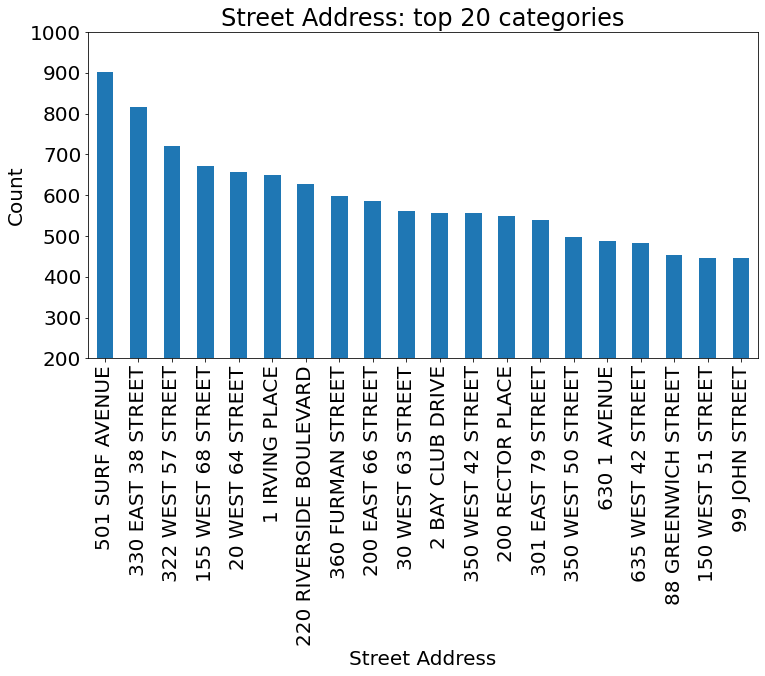

In [140]:
data['STADDR'].value_counts().head(20).plot(kind='bar')
plt.xlabel("Street Address")
plt.ylabel("Count")
plt.title("Street Address: top 20 categories")
plt.ylim(200,1000)

In [121]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [122]:
len(data['ZIP'].unique())

197

In [123]:
data['ZIP'].value_counts()

10314.0    24606
11234.0    20001
10312.0    18127
10462.0    16905
10306.0    16578
           ...  
11241.0        1
11005.0        1
11359.0        1
11371.0        1
11352.0        1
Name: ZIP, Length: 196, dtype: int64

Text(0.5, 1.0, 'Zip Code: top 20 categories')

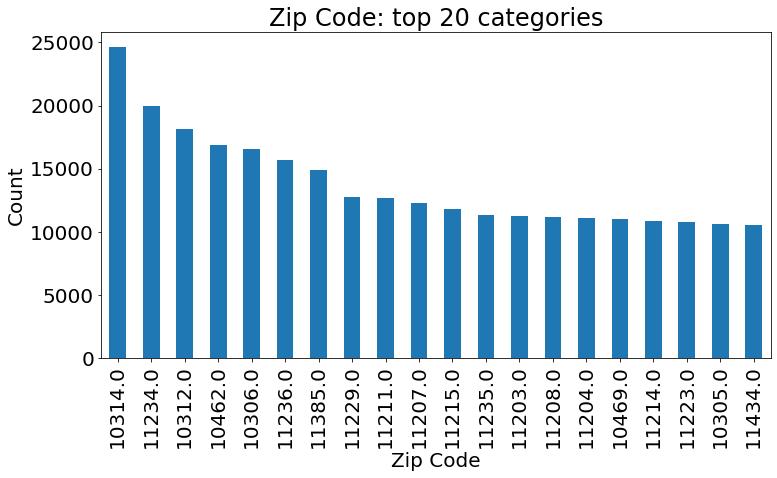

In [153]:
data['ZIP'].value_counts().head(20).plot(kind='bar')
plt.xlabel("Zip Code")
plt.ylabel("Count")
plt.title("Zip Code: top 20 categories")

In [125]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [126]:
len(data['EXMPTCL'].unique())

15

In [127]:
data['EXMPTCL'].value_counts()

X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
5        1
R4       1
A9       1
VI       1
KI       1
Name: EXMPTCL, dtype: int64

Text(0.5, 1.0, 'Exemption Class: top 20 categories')

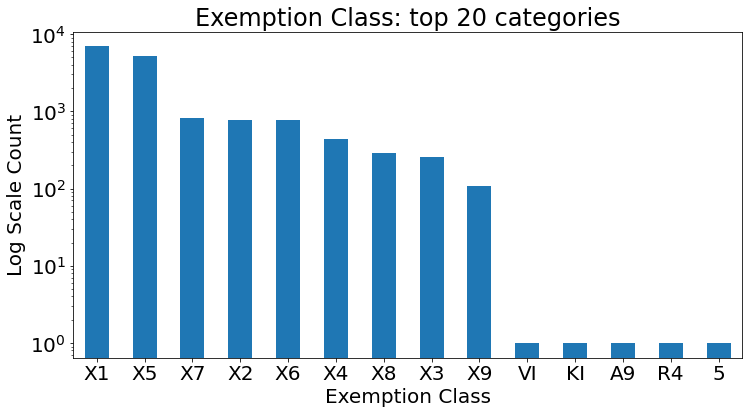

In [154]:
plt.yscale('log')
data['EXMPTCL'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Exemption Class")
plt.ylabel("Log Scale Count")
plt.title("Exemption Class: top 20 categories")

<AxesSubplot:xlabel='BLDFRONT'>

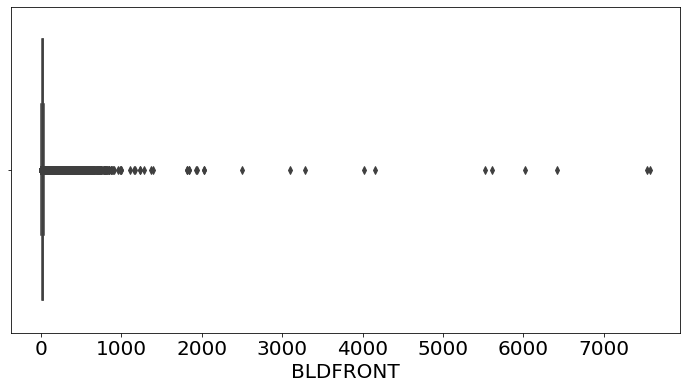

In [129]:
sns.boxplot(x='BLDFRONT', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Building Width')

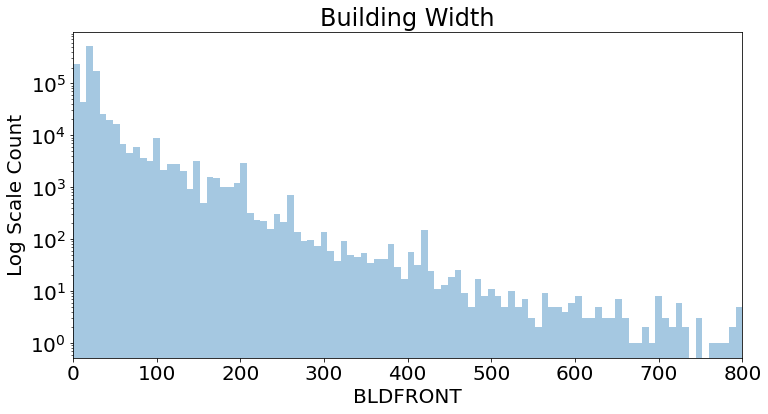

In [179]:
#look at the most relevant range
xhigh = 800
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('Log Scale Count')
plt.title("Building Width")

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT', ylabel='Log Scale Count'>

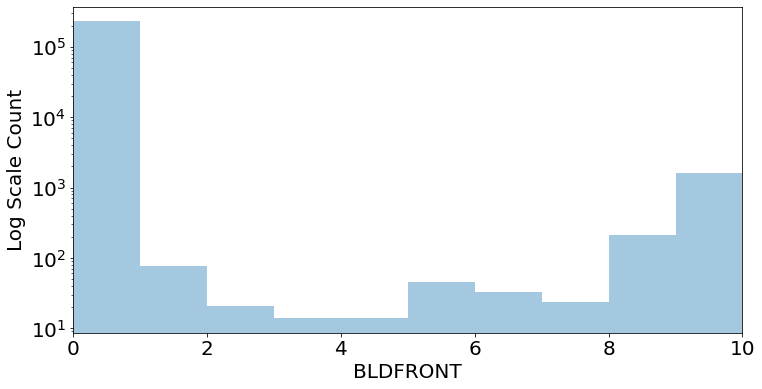

In [178]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
plt.ylabel('Log Scale Count')
sns.distplot(temp['BLDFRONT'],bins=10, kde=False)

<AxesSubplot:xlabel='BLDDEPTH'>

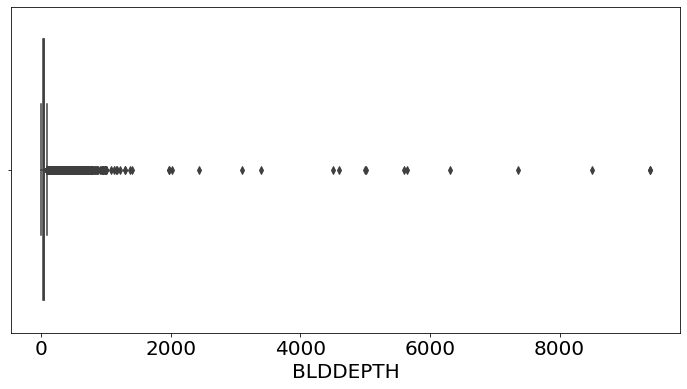

In [132]:
sns.boxplot(x='BLDDEPTH', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Building Depth')

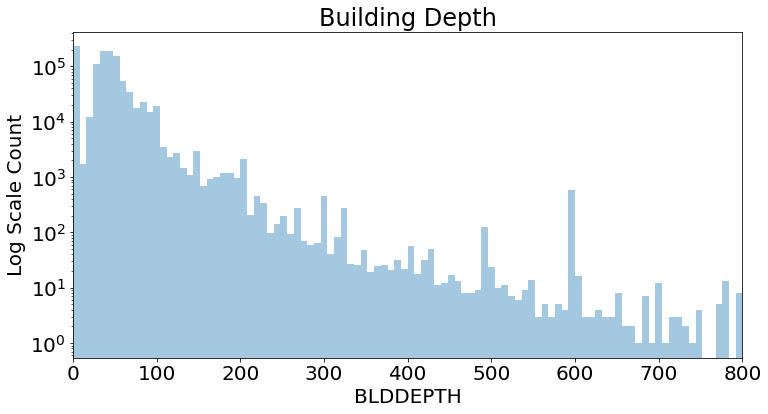

In [172]:
#look at the most relevant range
xhigh = 800
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('Log Scale Count')
plt.title("Building Depth")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

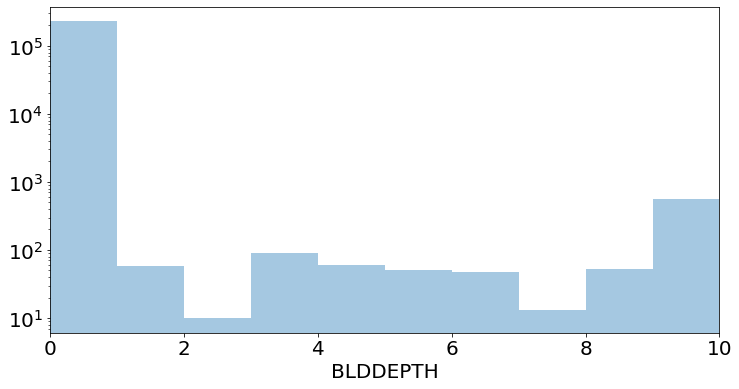

In [134]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDDEPTH'],bins=10, kde=False)

<AxesSubplot:xlabel='BLDFRONT'>

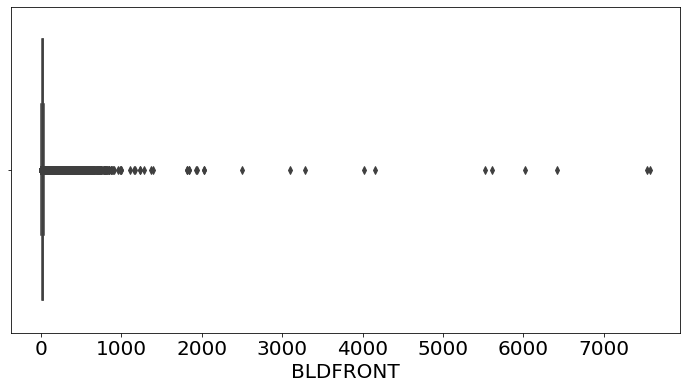

In [135]:
sns.boxplot(x='BLDFRONT', data=data)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

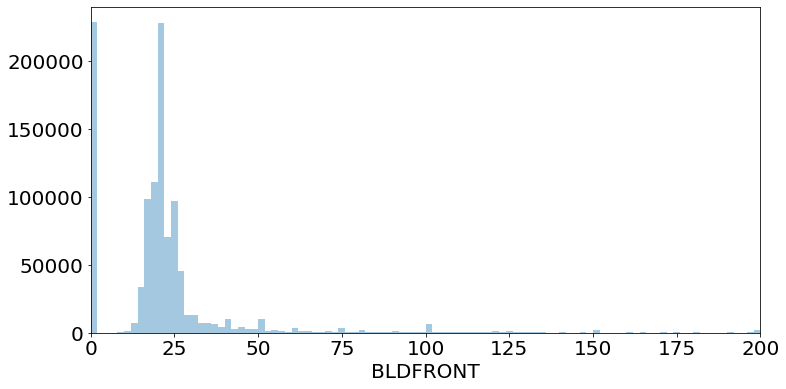

In [136]:
xhigh = 200
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=False)

In [137]:
len(data[data['BLDFRONT']==0])

228815

In [138]:
len(data[data['BLDFRONT']==1])

77

In [139]:
len(data[data["BLDFRONT"]==2])

21

In [140]:
data['BLDDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='BLDDEPTH'>

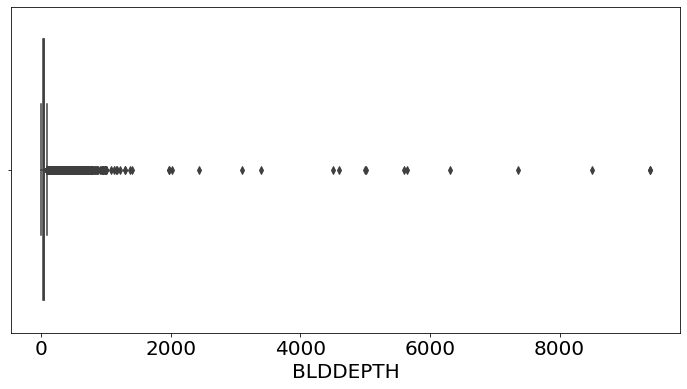

In [141]:
sns.boxplot(x='BLDDEPTH', data=data)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

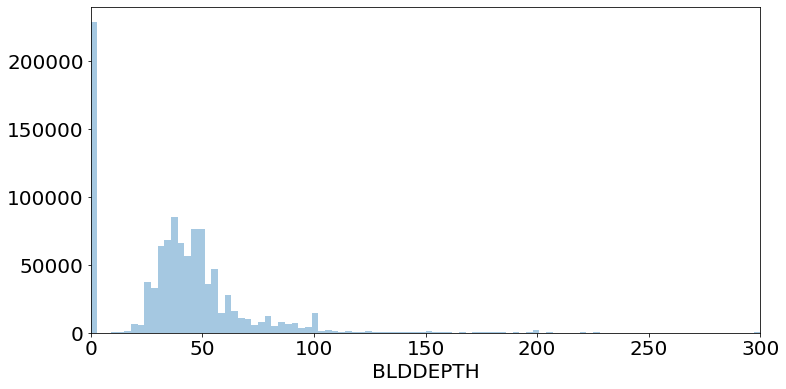

In [142]:
xhigh = 300
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=100, kde=False)

In [143]:
len(data[data['BLDDEPTH']==0])

228853

In [144]:
len(data[data['BLDDEPTH']==1])

59

In [145]:
len(data[data["BLDDEPTH"]==2])

10

In [146]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

In [22]:
data[data['AVLAND2']==0]

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE


<AxesSubplot:xlabel='AVLAND2'>

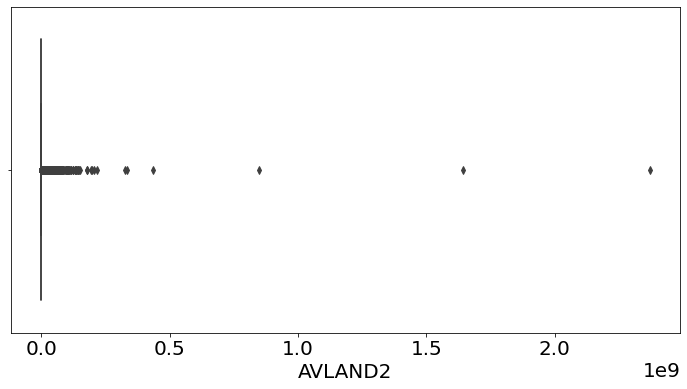

In [147]:
sns.boxplot(x='AVLAND2', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transitional Land Value')

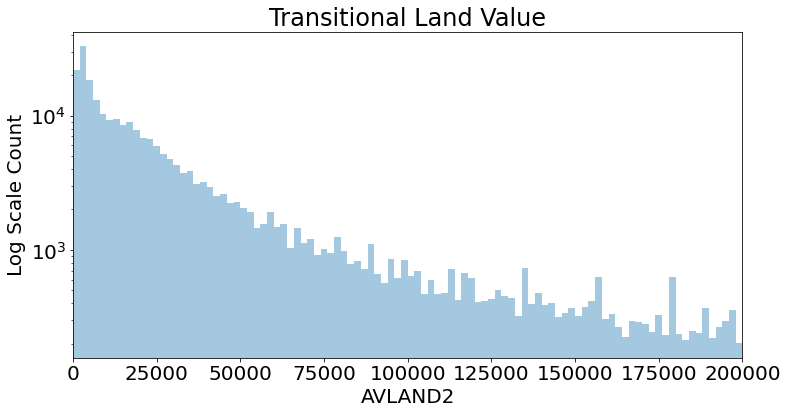

In [184]:
xhigh = 200000
plt.xlim(0,xhigh)
temp = data[data['AVLAND2'] <= xhigh]
sns.distplot(temp['AVLAND2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('Log Scale Count')
plt.title("Transitional Land Value")

In [149]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

In [189]:
len(data[data['AVTOT2']==0])

0

<AxesSubplot:xlabel='AVTOT2'>

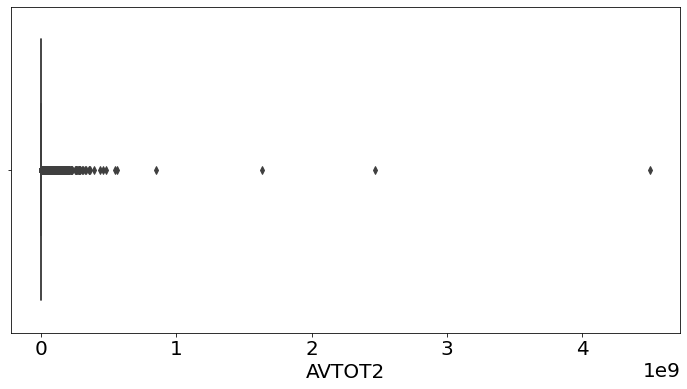

In [150]:
sns.boxplot(x='AVTOT2', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transitional Total Value')

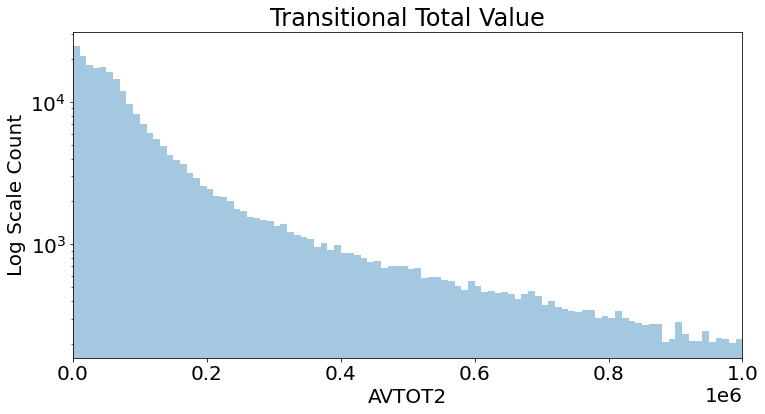

In [188]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['AVTOT2'] <= xhigh]
sns.distplot(temp['AVTOT2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('Log Scale Count')
plt.title("Transitional Total Value")

In [152]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

<AxesSubplot:xlabel='EXLAND2'>

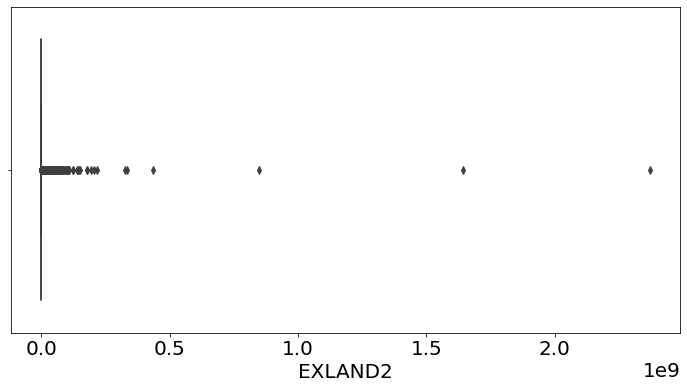

In [153]:
sns.boxplot(x='EXLAND2', data =data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transitional Exemption Land Value')

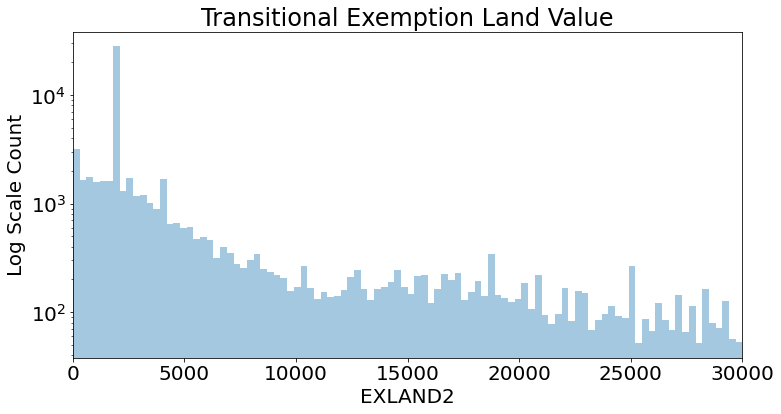

In [192]:
xhigh = 30000
plt.xlim(0,xhigh)
temp = data[data['EXLAND2'] <= xhigh]
sns.distplot(temp['EXLAND2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('Log Scale Count')
plt.title("Transitional Exemption Land Value")

In [155]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

<AxesSubplot:xlabel='EXTOT2'>

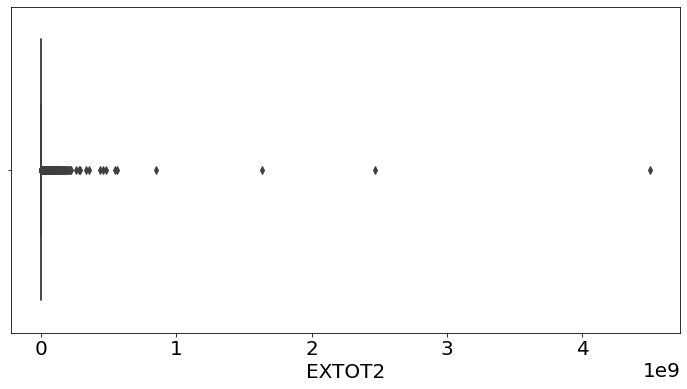

In [156]:
sns.boxplot(x='EXTOT2', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transitional Exemption Land Value')

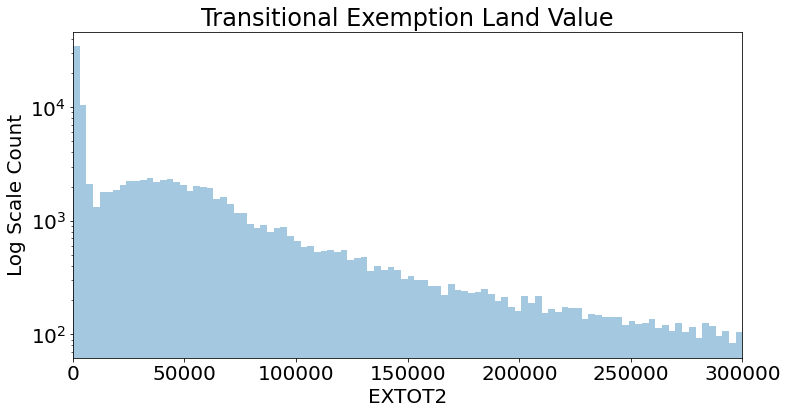

In [193]:
xhigh = 300000
plt.xlim(0,xhigh)
temp = data[data['EXTOT2'] <= xhigh]
sns.distplot(temp['EXTOT2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('Log Scale Count')
plt.title("Transitional Exemption Land Value")

In [29]:
len(data[data['EXTOT2'] <= 300000])/data['EXTOT2'].count()

0.8665499740116794

In [158]:
data['EXCD2'].count() * 100 / numrecords

8.678666733893934

<AxesSubplot:xlabel='EXCD2'>

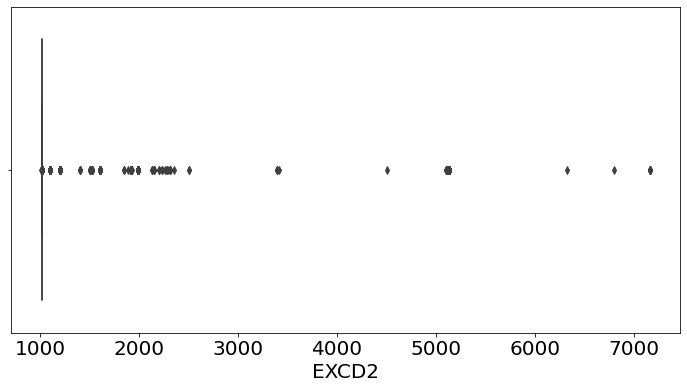

In [159]:
sns.boxplot(x='EXCD2', data=data)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Exemption Code 2')

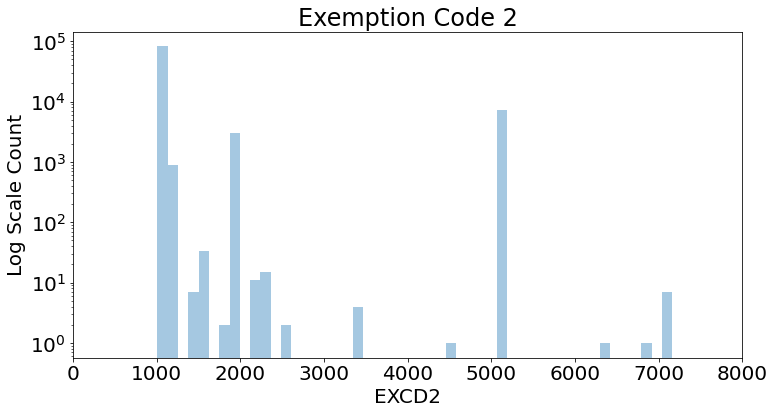

In [197]:
xhigh = 8000
plt.xlim(0,xhigh)
temp = data[data['EXCD2'] <= xhigh]
sns.distplot(temp['EXCD2'],bins=50, kde=False)
plt.yscale('log')
plt.ylabel('Log Scale Count')
plt.title("Exemption Code 2")

Text(0.5, 1.0, 'Exempt Code 2: top 20 categories')

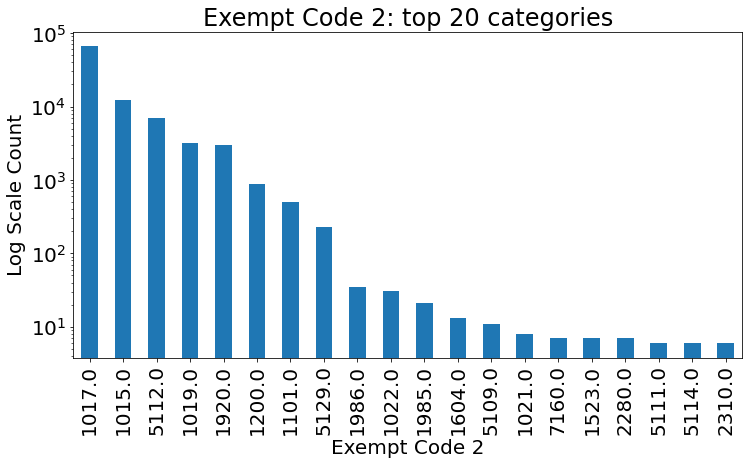

In [25]:
data['EXCD2'].value_counts().head(20).plot(kind='bar')
plt.yscale("log")
plt.ylabel("Log Scale Count")
plt.xlabel("Exempt Code 2")
plt.title("Exempt Code 2: top 20 categories")

In [161]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [162]:
len(data['PERIOD'].unique())

1

In [163]:
data['PERIOD'].value_counts()

FINAL    1070994
Name: PERIOD, dtype: int64

(array([0]), [Text(0, 0, 'FINAL')])

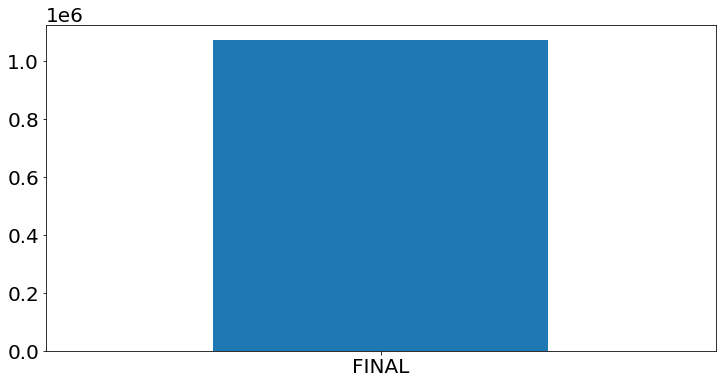

In [164]:
data['PERIOD'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [165]:
data['YEAR'].count() * 100 / numrecords

100.0

In [166]:
len(data['YEAR'].unique())

1

In [167]:
data['YEAR'].value_counts()

2010/11    1070994
Name: YEAR, dtype: int64

(array([0]), [Text(0, 0, '2010/11')])

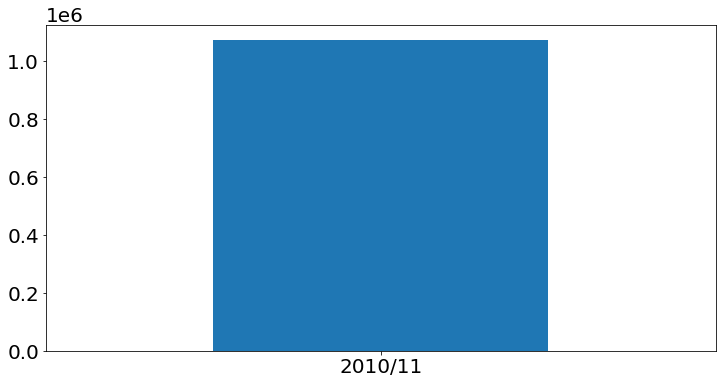

In [168]:
data['YEAR'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [169]:
data['VALTYPE'].count() * 100 / numrecords

100.0

(array([0]), [Text(0, 0, 'AC-TR')])

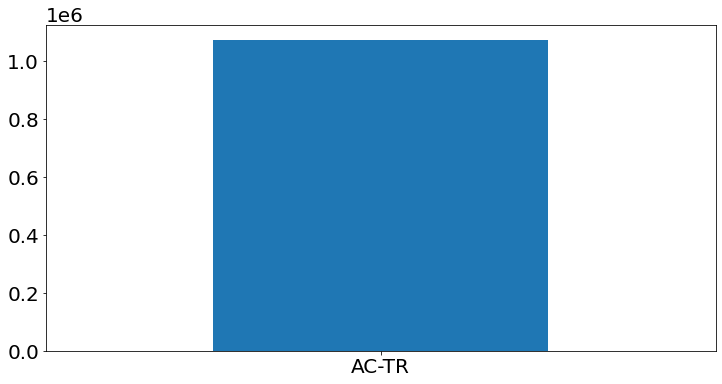

In [170]:
data['VALTYPE'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

In [171]:
print('duration: ', datetime.now() - start_time)

duration:  0:01:16.166222


In [48]:
len(data[data['LOT'] <= 1000])/data['LOT'].count()

0.8001688151380867